In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from datetime import timedelta
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
Engage = pd.read_csv('C:/Sumit/scripts/Take home Challenge - Relax Inc/input/takehome_user_engagement.csv')
Users = pd.read_csv('C:/Sumit/scripts/Take home Challenge - Relax Inc/input/takehome_users.csv', encoding='latin-1') # takehome_users.csv is encoded in utf-8. Hene using encoding='latin-1'

In [3]:
Engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
Users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
Engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
print(Engage.shape)
print(Users.shape)

(207917, 3)
(12000, 10)


In [8]:
Engage['time_stamp'] = pd.to_datetime(Engage['time_stamp'])
#Converting the unix time in 'last_session_creation_time' to python time stamp
Users['last_session_creation_time'] = Users['last_session_creation_time'].map(lambda x:
                                            datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'), na_action='ignore')

In [9]:
Users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 09:23:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 09:15:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-20 04:44:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 13:39:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 15:44:20,0,0,193,5240.0


In [10]:
Engage = Engage.set_index(pd.DatetimeIndex(Engage['time_stamp']))
#grouping by user-id, followed by week and summing up the number of visits per user-id per week                                  
Grouped = Engage.groupby('user_id').resample('1W').sum()

In [11]:
#dropping the userids that have no visits
Grouped = Grouped[Grouped['user_id'].isnull()==False].drop('user_id',axis=1)
Grouped.head(30)

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0
        2013-12-15        1
        2013-12-22        0
        2013-12-29        1
        2014-01-05        1
        2014-01-12        1
        2014-01-19        0
        2014-01-26        0
        2014-02-02        0
        2014-02-09        3
        2014-02-16        2
        2014-02-23        0
        2014-03-02        0
        2014-03-09        1
        2014-03-16        1
        2014-03-23        0
        2014-03-30        0
        2014-04-06        1
3       2013-03-24        1
4       2013-05-26        1
5       2013-01-27        1
6       2013-12-22        1
7       2012-12-23        1
10      2013-01-20        1
        2013-01-27        1
        2013-02-03        1

In [12]:
#Getting the users who have more than 3 visits per week
Active_users = Grouped['visited'] > 3
Active_users = Active_users.groupby(level=0).apply(np.sum)
Active_users = Active_users[Active_users != 0]
Active_users = pd.DataFrame(Active_users,index=Active_users.index)
Active_users.columns = ['Active Weeks']
Active_users.head(5)

,Active Weeks
user_id,
10,37
42,52
63,53
69,78
74,3


In [13]:
max(Engage.time_stamp)

Timestamp('2014-06-06 14:58:50')

In [14]:
min(Engage.time_stamp)

Timestamp('2012-05-31 08:20:06')

In [15]:
Users['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

###### ORG_INVITE is the most creation_source

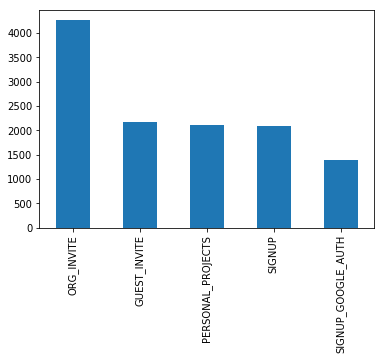

In [16]:
Users['creation_source'].value_counts().plot.bar()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64


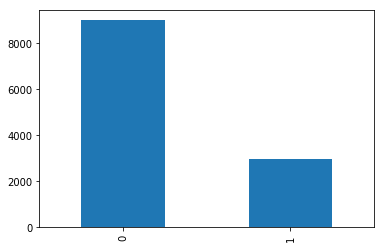

In [17]:
print(Users.opted_in_to_mailing_list.value_counts())
Users.opted_in_to_mailing_list.value_counts().plot.bar()

###### Only 2994 users have opted in for mailing list to get marketing emails

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64


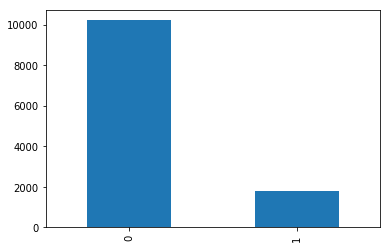

In [18]:
print(Users.enabled_for_marketing_drip.value_counts())
Users.enabled_for_marketing_drip.value_counts().plot.bar()

###### Only 1792 opted for getting regular marketing_drip

In [19]:
Users.object_id.count()

12000

In [20]:
from datetime import timedelta

def label_adopted(x):    
    "takes a users input and returns whether or not they have been active within any 7-day period"
    df_temp = Engage.loc[Engage['user_id'] == x] #select out rows of this user
    df_temp = df_temp.resample('D').mean().dropna() #resample to show if active in a day. .mean() is just of 1
    adopted = 0
    for i in range(len(df_temp)-2): #loop over active days till the second to last day
        if df_temp.index[i + 2] - df_temp.index[i] <= timedelta(days=7): # difference between every 1st and 3rd day
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [21]:
#apply to user df to label users as adopted=true 
Users['adopted_user'] = Users['object_id'].apply(label_adopted)

In [22]:
#Users['last_session_creation_time'] = Users['last_session_creation_time'].fillna(0)
Users['invited_by_user_id'] = Users['invited_by_user_id'].fillna(0)

In [23]:
Users['last_session_creation_time'] = pd.to_datetime(Users['last_session_creation_time'])
Users['creation_time'] = pd.to_datetime(Users['creation_time'])
#subtract to find time active
Users['usage_length'] = Users['last_session_creation_time'] - Users['creation_time']
#lets settle for seconds instead of days to make the time differences more distinct
Users['usage_length'] = [x.total_seconds() for x in Users['usage_length']]

In [24]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted_user                  12000 non-null int64
usage_length                  8823 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(5), object(3)
memory usage: 1.1+ MB


In [25]:
Users['email_provider'] = [x.split('@')[1] for x in Users.email]#select out the domain
top_emails = Users.email_provider.value_counts().index[:6]
top_emails
#label anything not in the top 5 as other
Users['email_provider'] = [x if x in top_emails else 'other' for x in Users.email_provider]

In [26]:
#Removing object_id creation_time name email and last_session_creation_time as we don't need them for analysis
feature_df = Users.iloc[:,4:]
feature_df.head()
feature_df = feature_df.drop('last_session_creation_time', axis=1)
feature_df['usage_length'] = feature_df['usage_length'].fillna(0)

In [27]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted_user                  12000 non-null int64
usage_length                  12000 non-null float64
email_provider                12000 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 750.1+ KB


###### Using sklearn.preprocessing.LabelEncoder to convert categorical variables to numeric

In [28]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
creation_labels = gle.fit_transform(feature_df['creation_source'])
feature_df.creation_source = creation_labels

org_id_labels = gle.fit_transform(feature_df['org_id'])
feature_df.org_id = org_id_labels

invited_labels = gle.fit_transform(feature_df['invited_by_user_id'])
feature_df.org_id = invited_labels

email_labels = gle.fit_transform(feature_df['email_provider'])
feature_df.email_provider = email_labels

In [29]:
feature_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length,email_provider
0,0,1,0,2325,10803.0,0,19800.0,6
1,1,0,0,56,316.0,1,11770200.0,2
2,1,0,0,298,1525.0,0,19800.0,2
3,0,0,0,1104,5151.0,0,106200.0,6
4,0,0,0,1127,5240.0,0,451800.0,6


In [30]:
from sklearn.model_selection import train_test_split

#set up data by seperating out the labels, then split for cross validation
data = feature_df.drop('adopted_user', axis=1)
labels = feature_df.adopted_user

X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

#train and test classifier
rf = RandomForestClassifier(class_weight='balanced_subsample')

rf.fit(X_train, X_test)

rf.score(y_train, y_test)

0.9681818181818181

###### The accuracy score seems to be very good. 96. 9 % is quite good

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

#print out classification report and confusion matrix
y_pred = rf.predict(y_train)

print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3407
           1       0.91      0.86      0.88       553

   micro avg       0.97      0.97      0.97      3960
   macro avg       0.94      0.92      0.93      3960
weighted avg       0.97      0.97      0.97      3960

confusion matrix:
[[3359   48]
 [  78  475]]


###### Overall the above results are impresive, the Random Forest Classifer doesn't seem to be overfit.